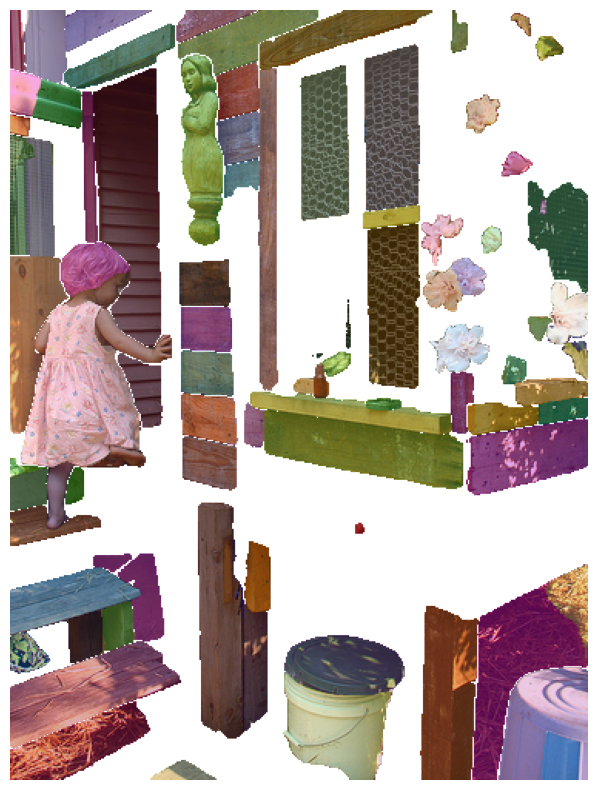

In [8]:
import os
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from PIL import Image

# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
model_type = "vit_b"
sam_checkpoint = "/kaggle/input/segment-anything/pytorch/vit-b/1/model.pth"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

# Load one image from Flickr8k
image_path = "/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate masks
masks = mask_generator.generate(image)

# Visualize masks
def show_anns(masks):
    if len(masks) == 0:
        return
    sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0],
                   sorted_anns[0]['segmentation'].shape[1], 4))
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.random.random((1, 3)).tolist()[0]
        img[m] = color_mask + [0.35]
    ax.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [5]:
import cv2
from segment_anything import SamPredictor
import matplotlib.pyplot as plt

# Sample image (replace with a Flickr8k image path)
image_path = "/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor = SamPredictor(sam)
predictor.set_image(image)

embedding = predictor.get_image_embedding().cpu().numpy()
print("Embedding shape:", embedding.shape)

Embedding shape: (1, 256, 64, 64)


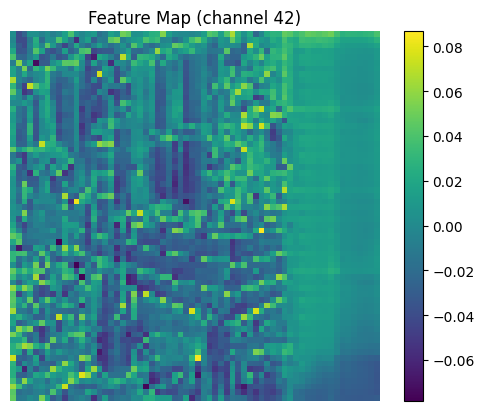

In [6]:
# Pick one channel to visualize as a heatmap
feature_map = embedding[0, 42]  # Example channel

plt.imshow(feature_map, cmap='viridis')
plt.title("Feature Map (channel 42)")
plt.axis('off')
plt.colorbar()
plt.show()

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


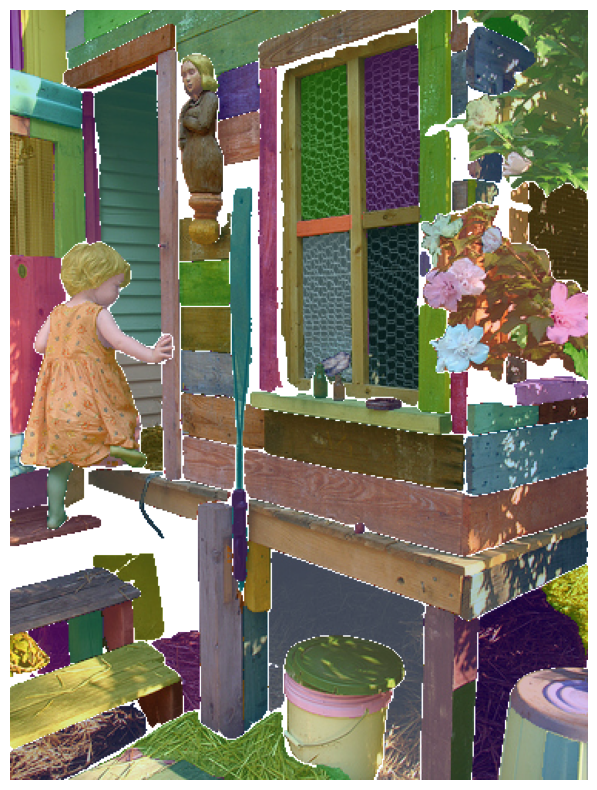

In [1]:
import os
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from PIL import Image

# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
model_type = "vit_h"
sam_checkpoint = "/kaggle/input/segment-anything/pytorch/vit-h/1/model.pth"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

# Load one image from Flickr8k
image_path = "/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate masks
masks = mask_generator.generate(image)

# Visualize masks
def show_anns(masks):
    if len(masks) == 0:
        return
    sorted_anns = sorted(masks, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((sorted_anns[0]['segmentation'].shape[0],
                   sorted_anns[0]['segmentation'].shape[1], 4))
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.random.random((1, 3)).tolist()[0]
        img[m] = color_mask + [0.35]
    ax.imshow(img)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()